In [1]:
!pip install seaborn

In [2]:
!pip install mlxtend

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

2023-02-27 15:05:33.233777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 15:05:33.294495: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-27 15:05:33.296619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ns-allinone-2.35/otcl-1.14:/opt/ns-allinone-2.35/lib
2023-02-27 15:05:33.296629: I tensor

In [4]:
 x,y=make_moons(100,noise=0.25,random_state=2)

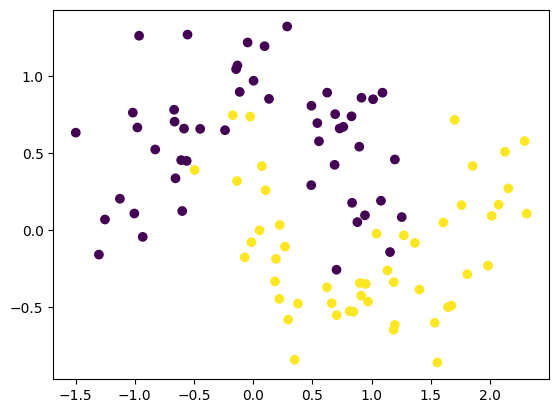

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [6]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


2023-02-27 15:05:33.945912: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ns-allinone-2.35/otcl-1.14:/opt/ns-allinone-2.35/lib
2023-02-27 15:05:33.945931: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-27 15:05:33.945942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CL01-31): /proc/driver/nvidia/version does not exist
2023-02-27 15:05:33.946104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compile

In [7]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1=model1.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 3s 310us/step


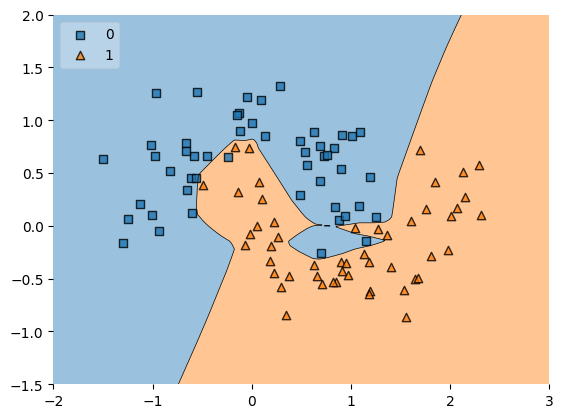

In [8]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

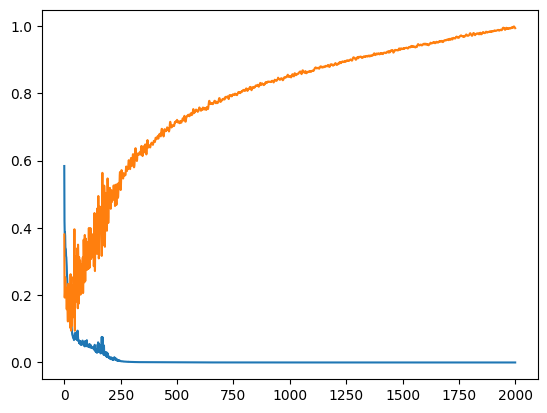

In [10]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [11]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [13]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model2.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 3s 332us/step


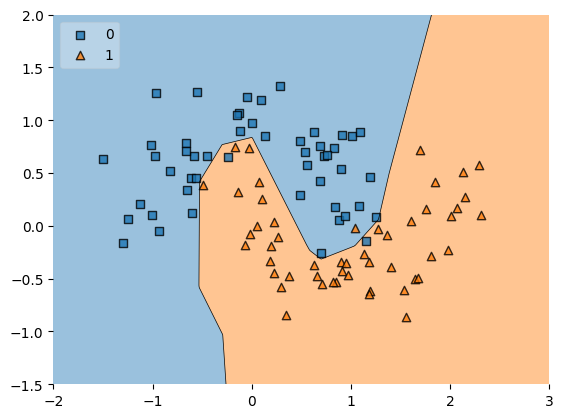

In [14]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

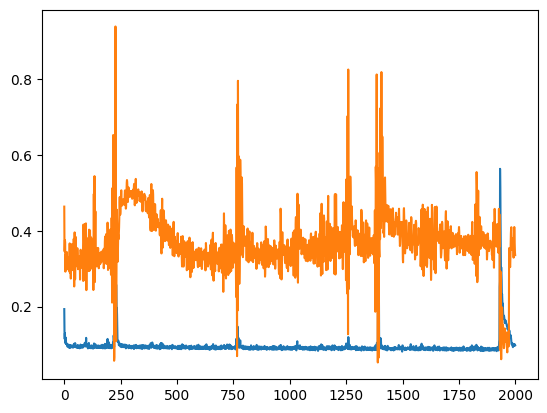

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [17]:
acc_model1=history1.history['accuracy'][-1]*100
acc_model2=history2.history['accuracy'][-1]*100
print(f"Accuracy for model1:{acc_model1:2f}%")
print(f"Accuracy for model2:{acc_model1:2f}%")

Accuracy for model1:97.500002%
Accuracy for model2:97.500002%
